## Importa pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Cria DataFrame utilizando arquivo de dados em CSV

In [5]:
name_file = 'country_vaccinations.csv'
df = pd.read_csv(name_file,sep=',')

## Visualiza as 5 primeiras linhas

In [6]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


## Retorna 5 amostras aleatórias

In [19]:
df.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2756,Azerbaijan,AZE,2021-07-19,4357839.0,2581000.0,1776839.0,483.0,35618.0,42.63,25.25,17.38,3484.0,"Oxford/AstraZeneca, Sinovac, Sputnik V",Government of Azerbaijan,https://koronavirusinfo.az
6827,Cameroon,CMR,2021-05-18,47488.0,45706.0,1782.0,0.0,809.0,0.17,0.17,0.01,30.0,"Oxford/AstraZeneca, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
30140,Norway,NOR,2020-12-14,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
43429,Venezuela,VEN,2021-05-17,0.0,0.0,0.0,0.0,1784.0,0.00,0.00,0.00,62.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",Pan American Health Organization,https://ais.paho.org/imm/IM_DosisAdmin-Vacunac...
40918,Tunisia,TUN,2021-03-26,38853.0,38853.0,0.0,6827.0,4570.0,0.33,0.33,0.00,383.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://www.facebook.com/santetunisie.rns.tn/p...


## Retorna o total de linhas e colunas (dimensões do DataFrame) 

In [11]:
df.shape

(44672, 15)

## Retorna os tipos de dados de cada coluna do dataframe

In [12]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

## Trata a coluna data, convertendo para o formato correto

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

## Retorna o total de valores nulos por coluna

In [7]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     20300
people_vaccinated                      21404
people_fully_vaccinated                24327
daily_vaccinations_raw                 24684
daily_vaccinations                       303
total_vaccinations_per_hundred         20300
people_vaccinated_per_hundred          21404
people_fully_vaccinated_per_hundred    24327
daily_vaccinations_per_million           303
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Trata os valores nulos, subistituindo por 0

In [14]:
df.fillna(0, inplace=True)

In [15]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Define o formato dos valores para visualização 

In [22]:
pd.options.display.float_format = '{:20,.2f}'.format

## Cria novo dataframe total por país
## Agrupando por country(país) e soma coluna total_vaccinations na ordem decrescente

In [45]:
df_total_country = df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False)

## Visualiza as 5 primeiras linhas

In [46]:
df_total_country.head(5)

country
China              181,458,930,700.00
India               54,445,659,235.00
United States       54,442,260,914.00
Brazil              14,021,396,024.00
United Kingdom      13,112,674,322.00
Name: total_vaccinations, dtype: float64

## Gera grafico de barras com os 20 primeiros países do dataframe df_total_contry

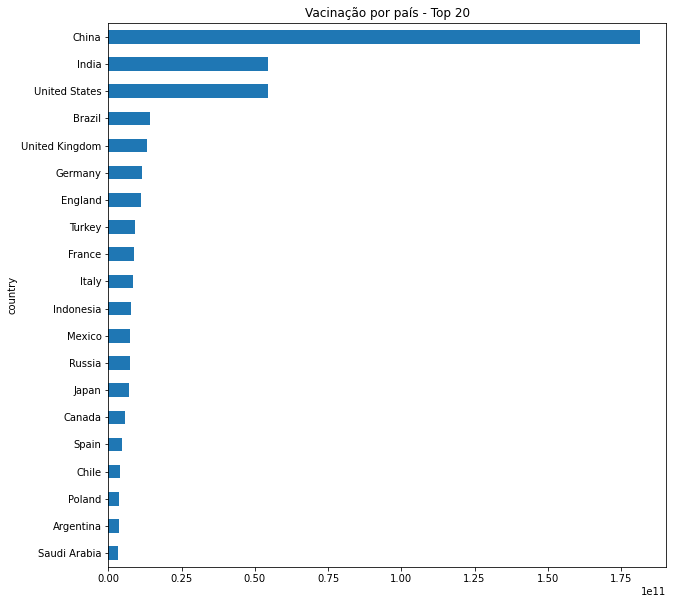

In [115]:
df_total_country.head(20).sort_values(ascending=True).plot.barh(title='Vacinação por país - Top 20', figsize=(10,10));

## Gera gráfico de pizza com os 15 primeiros países do dataframe df_total_contry

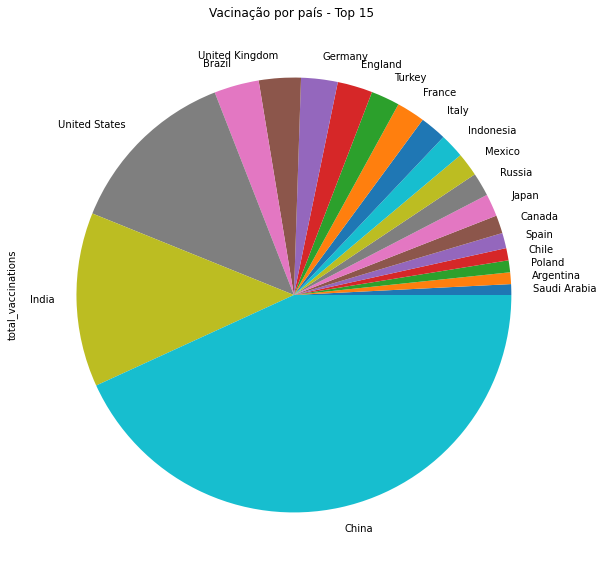

In [113]:
df_total_country.head(15).sort_values(ascending=True).plot.pie(title='Vacinação por país - Top 15 ', figsize=(10,10));

## Cria novo data frame total por mes
## Agrupo por ano e mes e soma total de vacinação

In [57]:
total_ano_mes = df.groupby([df['date'].dt.year, df['date'].dt.month]).total_vaccinations.sum()

## Gera gráfico de linha com o resultado, apresenta a evolução da vacinação por nês

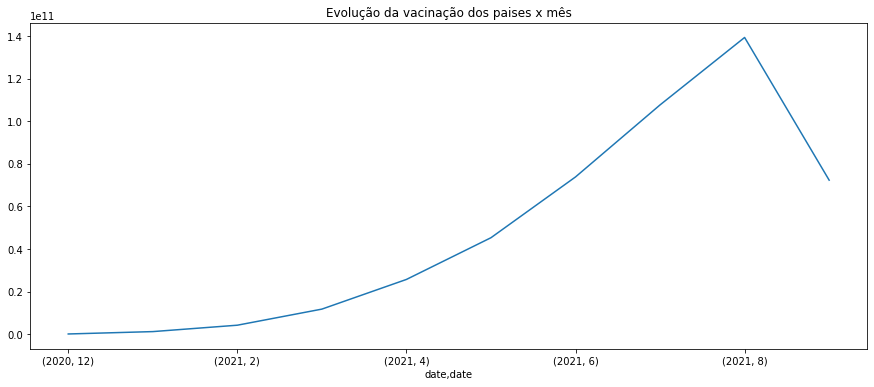

In [95]:
total_ano_mes.plot(title='Evolução da vacinação dos paises x mês', figsize=(15,6));

## Cria novo data frame filtrando apenas o país Brazil

In [67]:
filtro = df['country'] == 'Brazil'
df_brazil = df[filtro]

## Retorna os 10 primeiros resultados

In [107]:
df_brazil.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5697,Brazil,BRA,2021-01-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5698,Brazil,BRA,2021-01-17,112.00,112.00,0.00,112.00,112.00,0.00,0.00,0.00,1.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5699,Brazil,BRA,2021-01-18,"1,109.00","1,109.00",0.00,997.00,554.00,0.00,0.00,0.00,3.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5700,Brazil,BRA,2021-01-19,"11,470.00","11,470.00",0.00,"10,361.00","3,823.00",0.01,0.01,0.00,18.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5701,Brazil,BRA,2021-01-20,"28,543.00","28,543.00",0.00,"17,073.00","7,136.00",0.01,0.01,0.00,33.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5702,Brazil,BRA,2021-01-21,"136,519.00","136,519.00",0.00,"107,976.00","27,304.00",0.06,0.06,0.00,128.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5703,Brazil,BRA,2021-01-22,"245,877.00","245,877.00",0.00,"109,358.00","40,980.00",0.11,0.11,0.00,192.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5704,Brazil,BRA,2021-01-23,"537,774.00","537,774.00",0.00,"291,897.00","76,825.00",0.25,0.25,0.00,359.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5705,Brazil,BRA,2021-01-24,"604,722.00","604,722.00",0.00,"66,948.00","86,373.00",0.28,0.28,0.00,404.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
5706,Brazil,BRA,2021-01-25,"700,608.00","700,608.00",0.00,"95,886.00","99,928.00",0.33,0.33,0.00,467.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...


## Cria novo dataframe agrupando por mês

In [80]:
brasil_total_ano_mes = df_brazil.groupby([df_brazil['date'].dt.year, df_brazil['date'].dt.month]).total_vaccinations.sum()

## Define nome das colunas do dataframe

In [86]:
brasil_total_ano_mes.columns = ['Ano','Mes','Total']

## Mostra os 5 primeiros resultados

In [87]:

brasil_total_ano_mes.sort_values(ascending=True).head()

date  date
2021  1             11,441,704.00
      2            148,879,537.00
      3            349,044,993.00
      4            812,926,594.00
      5          1,348,141,942.00
Name: total_vaccinations, dtype: float64

## Gera gráfico de linha da evolução da vacinação no Brasil por mês

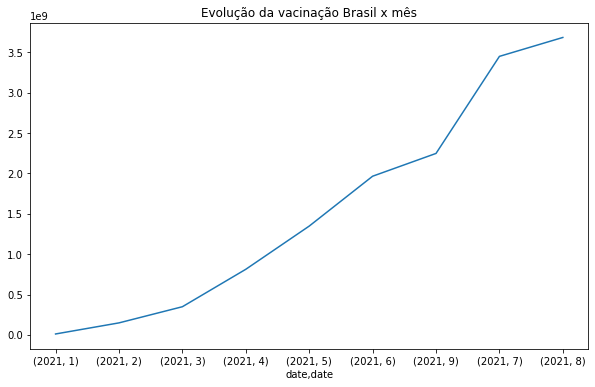

In [92]:

brasil_total_ano_mes.sort_values(ascending=True).plot(title='Evolução da vacinação Brasil x mês', figsize=(10,6));

## Cria novo dataframe com total da vacinação por dose (Pessoas vacinadas e Pessoas com vacinação completa)

In [108]:
total_vacinacao_por_dose = df.groupby([df['date'].dt.year, df['date'].dt.month])[['people_vaccinated', 'people_fully_vaccinated']].sum()

## Mostra dados do dataframe

In [109]:
total_vacinacao_por_dose

people_vaccinated  people_fully_vaccinated
date date                                              
2020 12          30,908,088.00                23,335.00
2021 1          879,093,950.00           104,589,040.00
     2        3,068,683,690.00           778,408,818.00
     3        7,606,421,819.00         2,649,191,604.00
     4       13,961,074,418.00         5,743,415,554.00
     5       21,006,685,381.00        10,570,664,122.00
     6       30,106,037,304.00        15,518,755,353.00
     7       40,750,706,215.00        22,785,651,502.00
     8       51,801,537,183.00        32,418,855,270.00
     9       27,430,957,804.00        17,381,432,309.00

## Gera gráfico de linha com a evolução de doses por mês no brasil

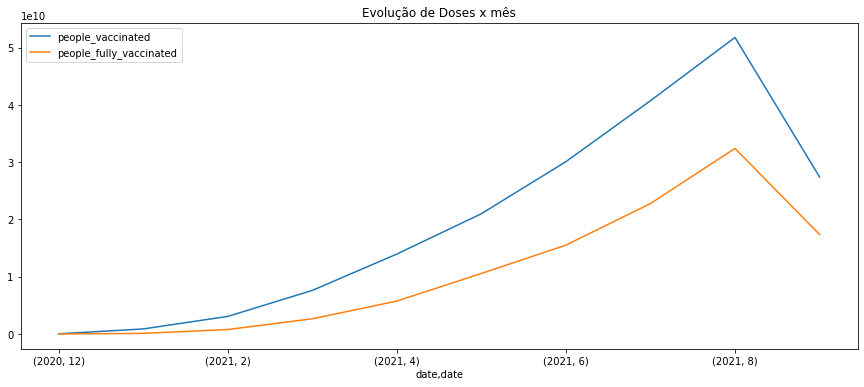

In [110]:
total_vacinacao_por_dose.plot(title='Evolução de Doses x mês', figsize=(15,6))